# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
path=r'C:\Users\ANIL\Desktop\python\SVM Algorithm'
os.chdir(path)

In [3]:
dataset=pd.read_csv('titanic.csv')
dataset.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
dataset.shape

(418, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
def StrToFloat(x):
 dataset[x]=label_encoder.fit_transform(dataset[x])
 dataset[x].unique()
for i in dataset.columns:
 StrToFloat(i)

In [7]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
def StrToFloat(x):
 dataset[x]=label_encoder.fit_transform(dataset[x])
 dataset[x].unique()
for i in dataset.columns:
 StrToFloat(i)

In [9]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Name'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Ticket'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Cabin'}>,
        <AxesSubplot:title={'center':'Embarked'}>]], dtype=object)

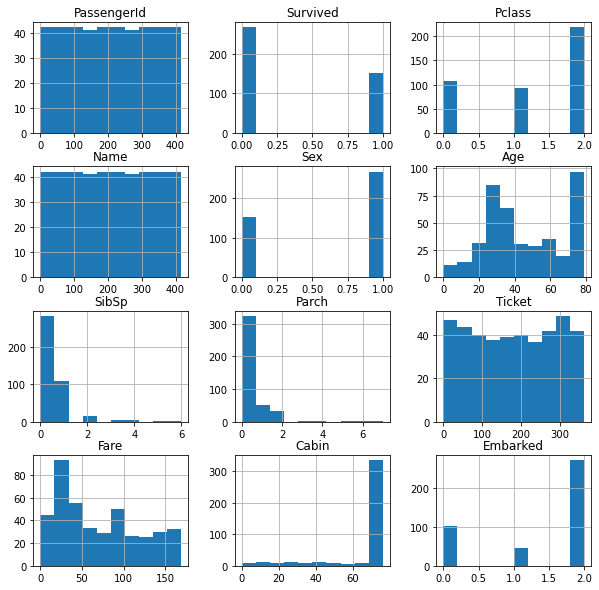

In [10]:
dataset.hist(figsize=(10,10))

In [11]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,206,1,44,0,0,152,24,76,1
1,1,1,2,403,0,60,1,0,221,5,76,2
2,2,0,1,269,1,74,0,0,73,41,76,1
3,3,0,2,408,1,34,0,0,147,34,76,2
4,4,1,2,178,0,27,1,1,138,46,76,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,0,2,353,1,79,0,0,267,31,76,2
414,414,1,0,283,0,51,0,0,324,154,22,0
415,415,0,2,332,1,50,0,0,346,9,76,2
416,416,0,2,384,1,79,0,0,220,31,76,2


In [12]:
dataset.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,2,1,44,0,0,1
1,1,2,0,60,1,0,2
2,0,1,1,74,0,0,1
3,0,2,1,34,0,0,2
4,1,2,0,27,1,1,2
...,...,...,...,...,...,...,...
413,0,2,1,79,0,0,2
414,1,0,0,51,0,0,0
415,0,2,1,50,0,0,2
416,0,2,1,79,0,0,2


## 

In [13]:
#Extracting Independent and dependent Variable  

In [14]:
x= dataset.iloc[:, [2,3,4,5,6,7]].values  
y= dataset.iloc[:,1].values

In [15]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 


In [16]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=65)  
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=65)

In [17]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[58  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        47

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [19]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [20]:
accuracy = grid_search.best_score_

In [21]:
accuracy

1.0

In [22]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [23]:
x_train

array([[  0, 321,   0,  42,   0,   0],
       [  2,  86,   1,  45,   0,   0],
       [  2,   4,   0,  22,   0,   0],
       ...,
       [  2, 341,   0,   5,   1,   1],
       [  2, 345,   1,  79,   0,   0],
       [  2, 128,   1,  29,   1,   0]], dtype=int64)

In [24]:
x_test

array([[  2, 333,   1,  18,   6,   2],
       [  2, 233,   1,  79,   0,   0],
       [  0,  59,   0,  65,   0,   0],
       [  2, 282,   1,  79,   0,   0],
       [  2, 165,   0,  58,   1,   0],
       [  0, 168,   1,  67,   1,   1],
       [  0, 130,   0,  29,   0,   1],
       [  2, 187,   1,  79,   0,   0],
       [  2, 284,   1,  12,   0,   1],
       [  2, 278,   1,  26,   0,   0],
       [  1, 383,   0,  39,   0,   0],
       [  0,  71,   0,  46,   0,   0],
       [  1, 386,   1,  29,   1,   0],
       [  1,  26,   1,  29,   0,   0],
       [  1, 114,   1,  22,   0,   0],
       [  2, 261,   1,  79,   0,   0],
       [  2, 213,   0,  27,   2,   0],
       [  1, 301,   1,  54,   0,   0],
       [  0, 352,   0,  29,   1,   0],
       [  2, 334,   0,  79,   6,   2],
       [  1,  39,   1,  32,   0,   0],
       [  2,  55,   0,  26,   0,   0],
       [  1, 397,   1,  79,   0,   0],
       [  1, 247,   1,  79,   0,   0],
       [  2, 379,   1,  39,   3,   0],
       [  0, 351,   1,  3